<h2 style = 'color: orange'> Projeto Integrado - Sprint 6 - ICE (Video Games On-Line Shop) </h2>

<br>

<h3 style = 'color: orange'> Etapa 1. Abra o arquivo de dados e estude as informações gerais</h3>

In [280]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

# Importando Libs de plots
import matplotlib.pyplot as plt
import seaborn as sns

In [281]:
df = pd.read_csv('games.csv')

In [282]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<h3 style = 'color: orange'> Etapa 2. Prepare os dados</h3>

In [283]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [284]:
# Padronizando o nome das colunas

new_columns = []

for names in df.columns:
    names = names.lower()
    names = names.strip()
    new_columns.append(names)

df.columns = new_columns

In [285]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [286]:
# Obtendo informações sobre o DataFrame e seus tipos de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [287]:
# Entendendo o percentual de dados nulos para cada coluna

df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [288]:
# Passando os dados da coluna 'year_of_release' de FLOAT para INT.
# Os principais motivos são a economia de espaço na memória (desempenho), semântica, legibilidade e compatibilidade com possíveis operações.
# Para isso excluirei as linhas que essas colunas possuem valores nulos (menos de 2% dos dados)

df = df.dropna(subset=['year_of_release'])

In [289]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


In [291]:
# Substituindo os dados nulos das colunas 'name' e 'genre' por strings informativas. Opção adotada por se tratar de colunas com dados qualitativos.

df['name'].fillna('unknown_name', inplace = True)

In [292]:
df['genre'].fillna('unknown_genre', inplace = True)

In [293]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

As colunas 'critic_score', 'user_score' e 'rating' possuem muitos dados nulos. Por isso não poderão ter essas linhas simplesmente excluidas.<br>
Essas colunas precisarão ser analisadas minuciosamente.

In [294]:
# Analizando a coluna 'critic_score':

df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [295]:
# Analisando os dados nulos da coluna:

df[df['critic_score'].isna()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Não encontrei nenhuma relação entre as outras colunas e os dados nulos na coluna 'critic_score'

In [296]:
# Analizando a coluna 'user_score':

df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [297]:
# Analisando os dados 'tbd' da coluna:

df['user_score'].value_counts()['tbd']

2376

In [298]:
tbd_user_score = df[df['user_score'] == 'tbd']
tbd_user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [299]:
tbd_user_score['na_sales'].max()

3.45

In [300]:
tbd_user_score['eu_sales'].max()

2.59

In [301]:
tbd_user_score['jp_sales'].max()

0.86

In [302]:
tbd_user_score['other_sales'].max()

1.09

Os dados 'tbd' parecem estar presentes devido ao baixo numero de vendas dos jogos (principalmente no Japão onde são inferior a 1 milhão). 

In [303]:
# Analisando os dados nulos da coluna:

df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Não encontrei nenhuma relação entre as outras colunas e os dados nulos na coluna 'user_score'.

In [304]:
# Analisando a coluna 'rating':

df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [305]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Não encontrei nenhuma relação entre as outras colunas e os dados nulos na coluna 'rating'.

Como não encotrei nenhuma relação para os dados nulos das tres colunas analisadas, opto por deixa-los como estão.

O seu grande volume impede que sejam descartados. Isso ocasionaria uma perda de dados que comprometeria a anáise.

Caso no decorrer da análise perceba que há necessidade de altera-los, assim o farei.

In [306]:
# Criando coluna com total de vendas:

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [307]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<h3 style = 'color: orange'> Etapa 3. Analise os dadoss</h3>

In [308]:
# Quantos jogos foram lançados para cada ano (não contando mesmo jogos lançados para plataformas diferentes):

releases_per_year = df.drop_duplicates(subset= 'name')
releases_per_year = releases_per_year.groupby('year_of_release')['name'].count().reset_index()
releases_per_year.head(10)

,year_of_release,name
0,1980,8
1,1981,43
2,1982,33
3,1983,16
4,1984,13
5,1985,13
6,1986,21
7,1987,15
8,1988,11
9,1989,14


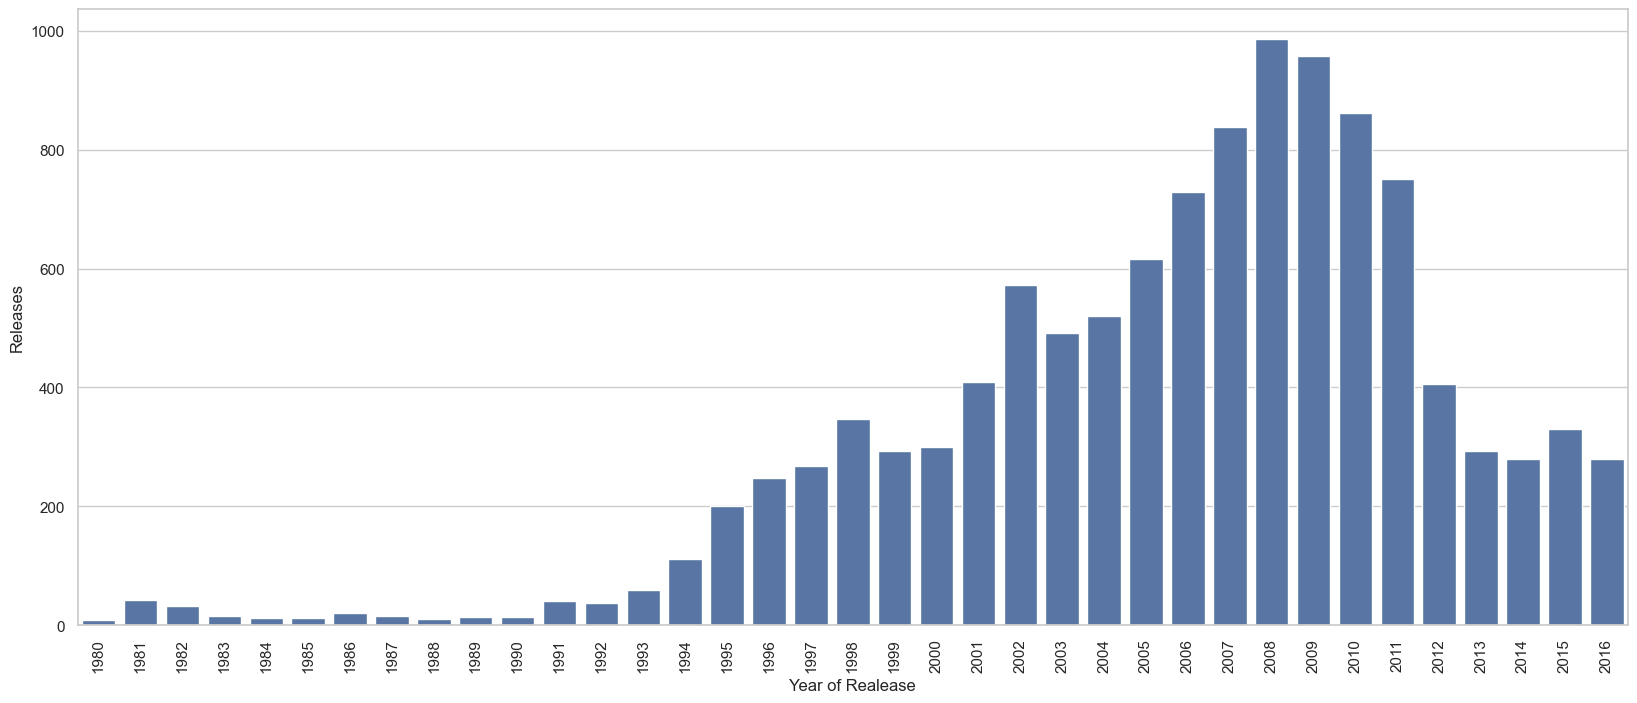

In [309]:
sns.set_theme(style="whitegrid")

fig, (ax1) = plt.subplots(1, figsize=(20, 8))

sns.barplot(x = 'year_of_release',
            y= 'name',
            data = releases_per_year, ax = ax1);

ax1.set_xlabel("Year of Realease");
ax1.set_ylabel("Releases");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);

O número de lançamentos tem um grande aumento no início dos anos 90.

Essa tendência de crescimento se mantém até o ano 2008 (ano com maior número de lançametos do período analisado).

Em 2009 a tendência inverte apresentando uma queda acentuada até 2013, quando o número de lançamentos parece se estabilizar.

In [310]:
# Analisando e vizualizando as vendas por plataformas:

sales_per_platforms = df.groupby('platform')['total_sales'].sum().reset_index().sort_values(by= 'total_sales', ascending= False)

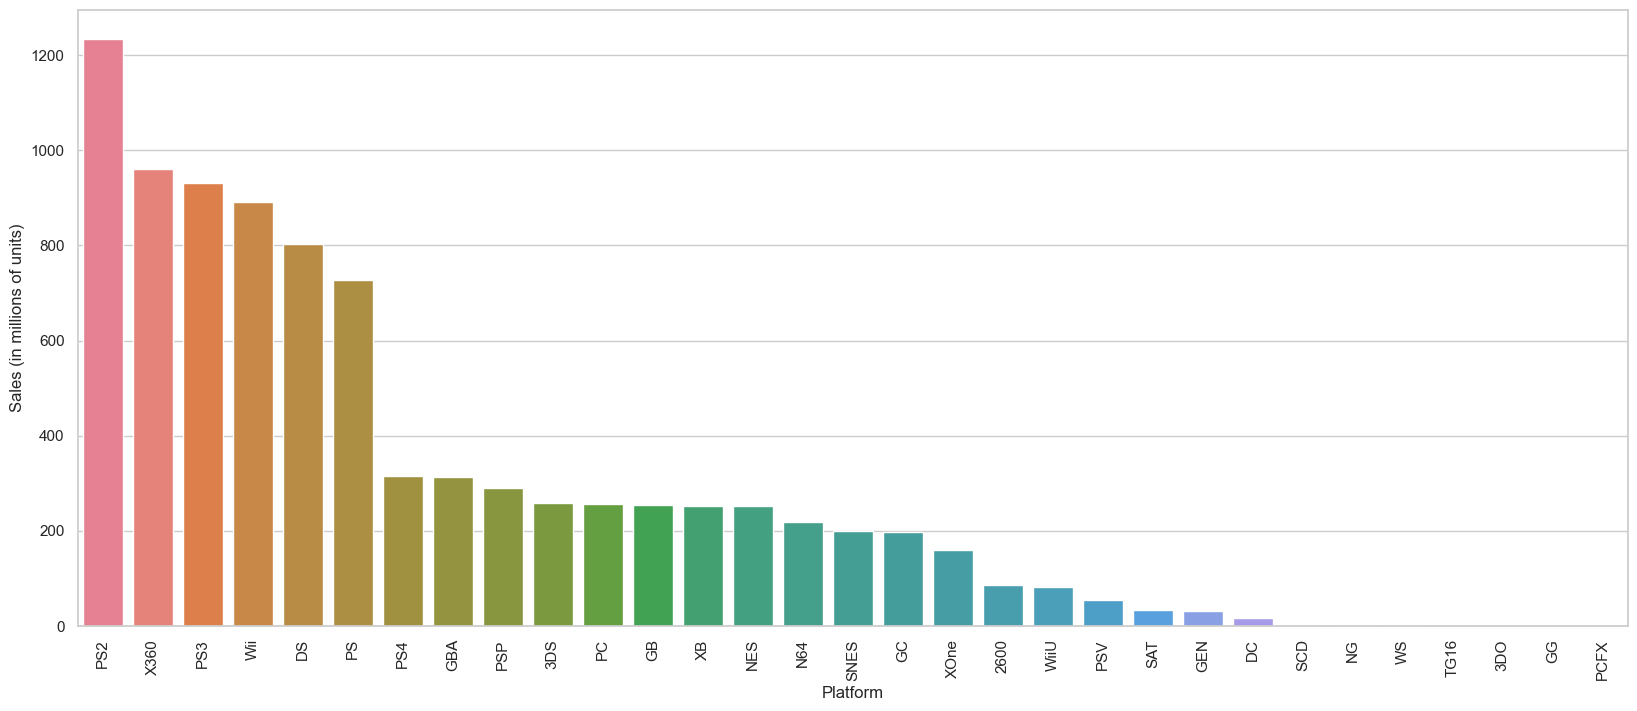

In [311]:
fig, (ax1) = plt.subplots(1, figsize=(20, 8))

sns.barplot(hue = 'platform',
            x = 'platform',
            y= 'total_sales',
            data = sales_per_platforms, ax = ax1);

ax1.set_xlabel("Platform");
ax1.set_ylabel("Sales (in millions of units)");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);

O PS2 é a plataform que mais vendeu jogos.

Mais para frente poderemos perceber se esse enorme sucesso esta relacionado com o périodo do BOOM no mercado dos jogos.

In [312]:
# Analisando as 10 plataformas que mais venderam:

top_10_platforms = df.groupby('platform')['total_sales'].sum().reset_index().sort_values(by= 'total_sales', ascending= False).reset_index(drop= True).head(10)
top_10_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [313]:
# Obtendo as top10 plataformas no formato lista:

list_top_10 = top_10_platforms['platform'].to_list()
list_top_10

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [314]:
# Obtendo as top10 plataforma com sua vendas por ano:

top_10_platforms_sales = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
top_10_platforms_sales = top_10_platforms_sales.query('platform in @list_top_10')

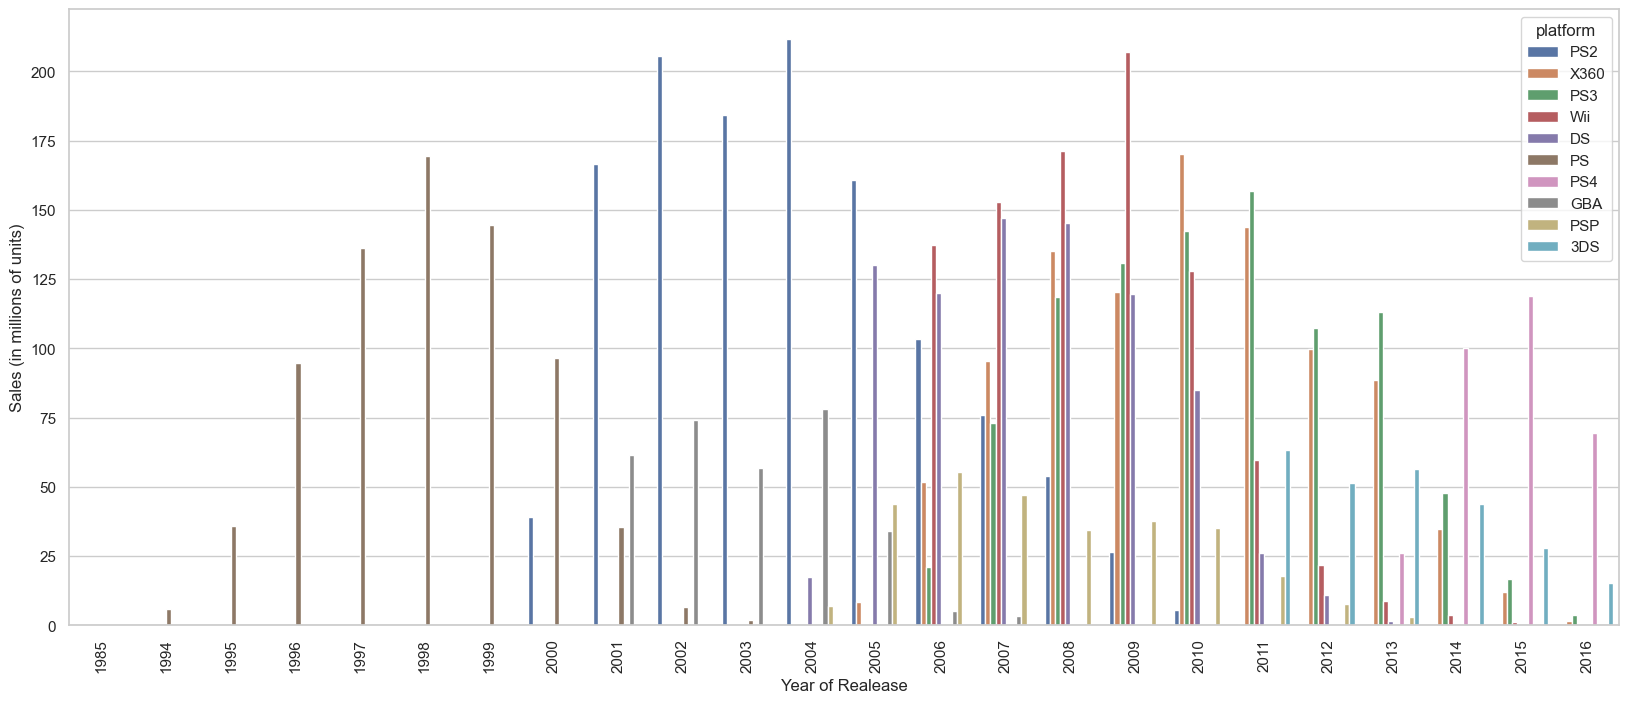

In [315]:
fig, (ax1) = plt.subplots(1, figsize=(20, 8))

sns.barplot(hue = 'platform',
            hue_order = list_top_10,
            x = 'year_of_release',
            y= 'total_sales',
            data = top_10_platforms_sales, ax = ax1);

ax1.set_xlabel("Year of Realease");
ax1.set_ylabel("Sales (in millions of units)");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);


Ao analisar o gráfico percebemos que o domínio das plataformas tem validade, certamento isso se deve a evolução da tecnologia embarcada. O tempo entre o surgimento e o desaparecimento de uma plataforma é de aproximadamente 9 anos (um pouco menos que isso é o surgimento de uma nova que virá a substituir a anterior).

As plataformas PS (1, 2, 3, 4) apresentam um forte domínio do mercado. No período observado, só não dominaram as vendas por 5 anos (2006 a 2010). Onde nesses 4 primeiros anos o Wii se destacou e depois o X360 teve seu momento no topo.

In [316]:
# Obtendo os resultados das plataformas a partir de 2012 (período que o mercado parece estar 'estabilizado'):

sales_from_2012 = df.query('year_of_release >= 2012')

In [317]:
# Criando lista para padronizar as cores nos gráficos:

list_platform_from_2012 = sales_from_2012['platform'].unique().tolist()
list_platform_from_2012

['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV', 'PSP']

In [318]:
sales_from_2012_group = sales_from_2012.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

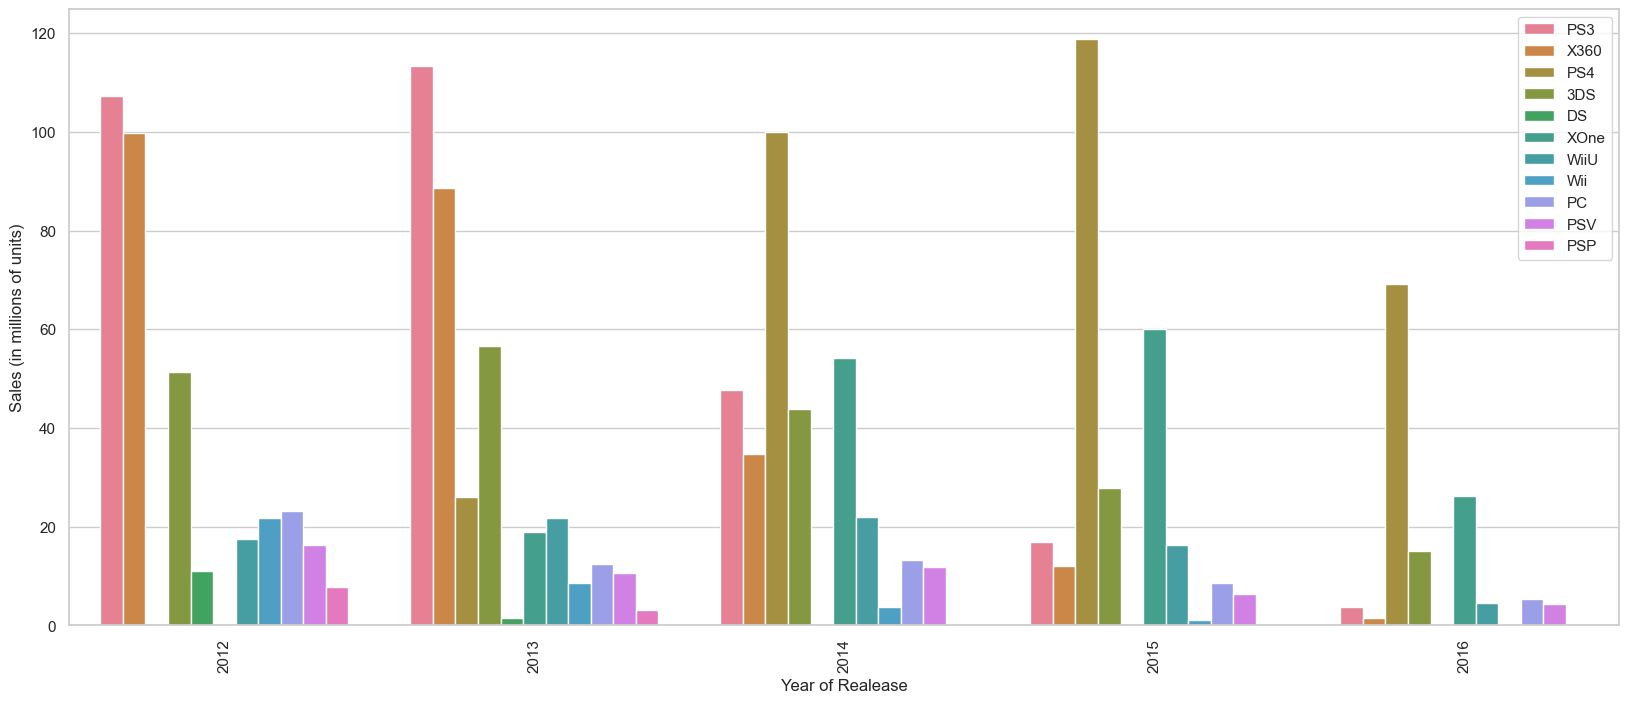

In [319]:
fig, (ax1) = plt.subplots(1, figsize=(20, 8))

sns.barplot(hue = 'platform',
            hue_order = list_platform_from_2012,
            x = 'year_of_release',
            y= 'total_sales',
            data = sales_from_2012_group, ax = ax1);

ax1.set_xlabel("Year of Realease");
ax1.set_ylabel("Sales (in millions of units)");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);
ax1.legend(bbox_to_anchor=(1,1), loc='upper right');

As plataformas PS seguem dominando o mercado. Entre 2013 e 2014 houve a passagem de posto da PS3 para PS4, que segue dominando as vendas até o final do período analisado.

Desde 2013 a plataforma XOne tem apresentando um bom desempenho e aumentado sua participação no mercado.

Além das plataforma supracitadas apenas a PSP apresenta estabilidade e também pode ser uma boa opção de investimento.

A principal queda (além do PS3 que teve a versão atualizada para o PS4) foi a da plataforma X360 que em 2016 apresenta o pior resultado entre as plataformas observadas.

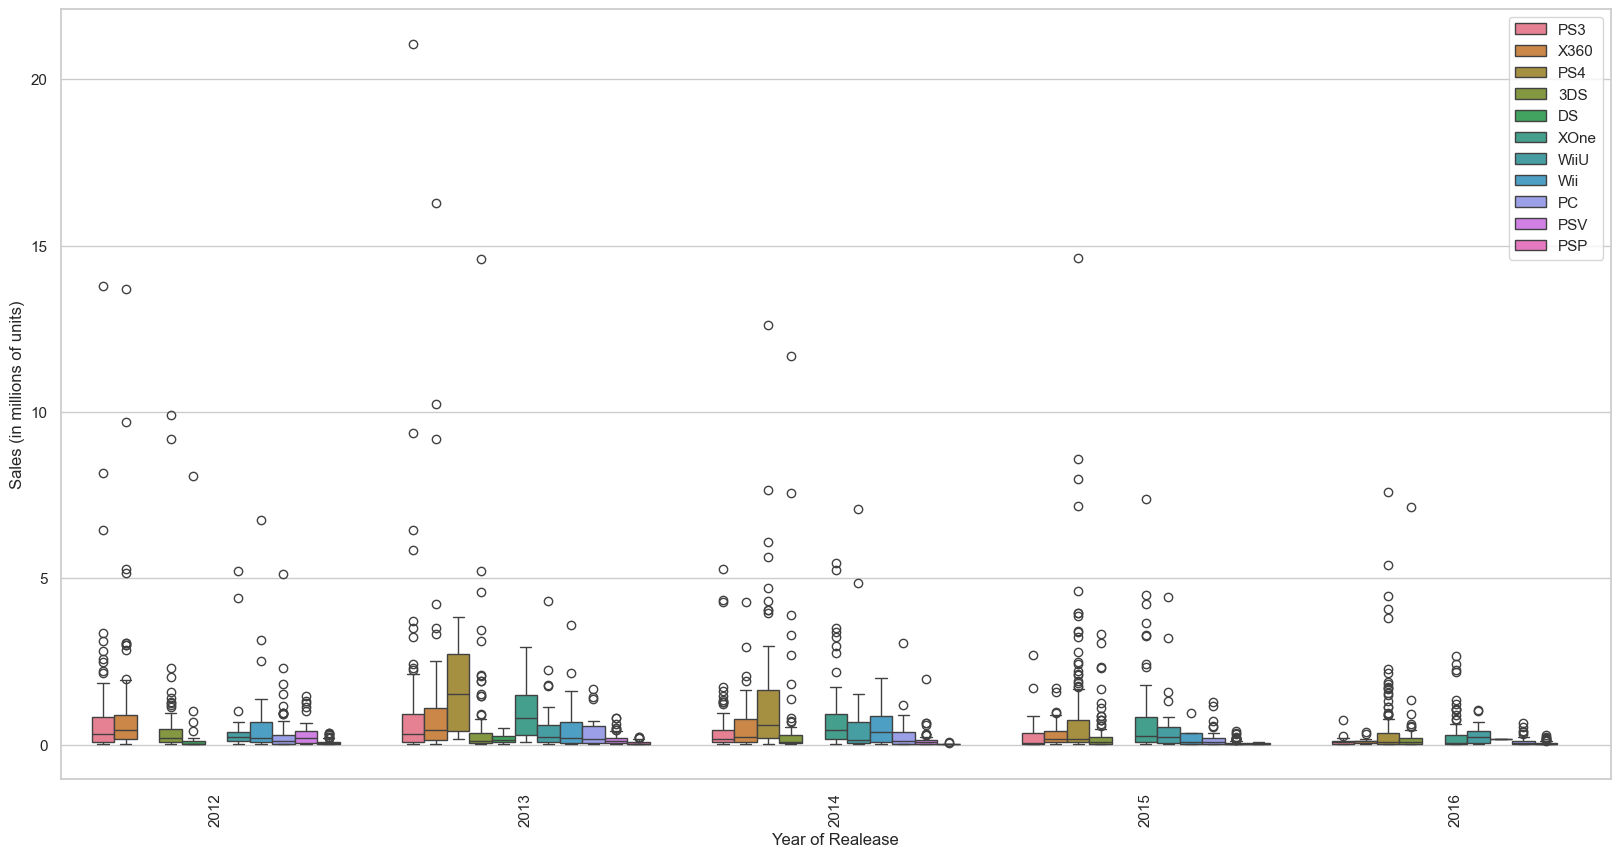

In [320]:
# Boxplots (2 gráficos) das vendas globais dos jogos por plataformas:

fig, (ax1) = plt.subplots(1, figsize=(20, 10))

sns.boxplot(hue = 'platform',
            hue_order = list_platform_from_2012,
            x = 'year_of_release',
            y= 'total_sales',
            data = sales_from_2012, ax = ax1);

ax1.set_xlabel("Year of Realease");
ax1.set_ylabel("Sales (in millions of units)");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);
ax1.legend(bbox_to_anchor=(1,1), loc='upper right');

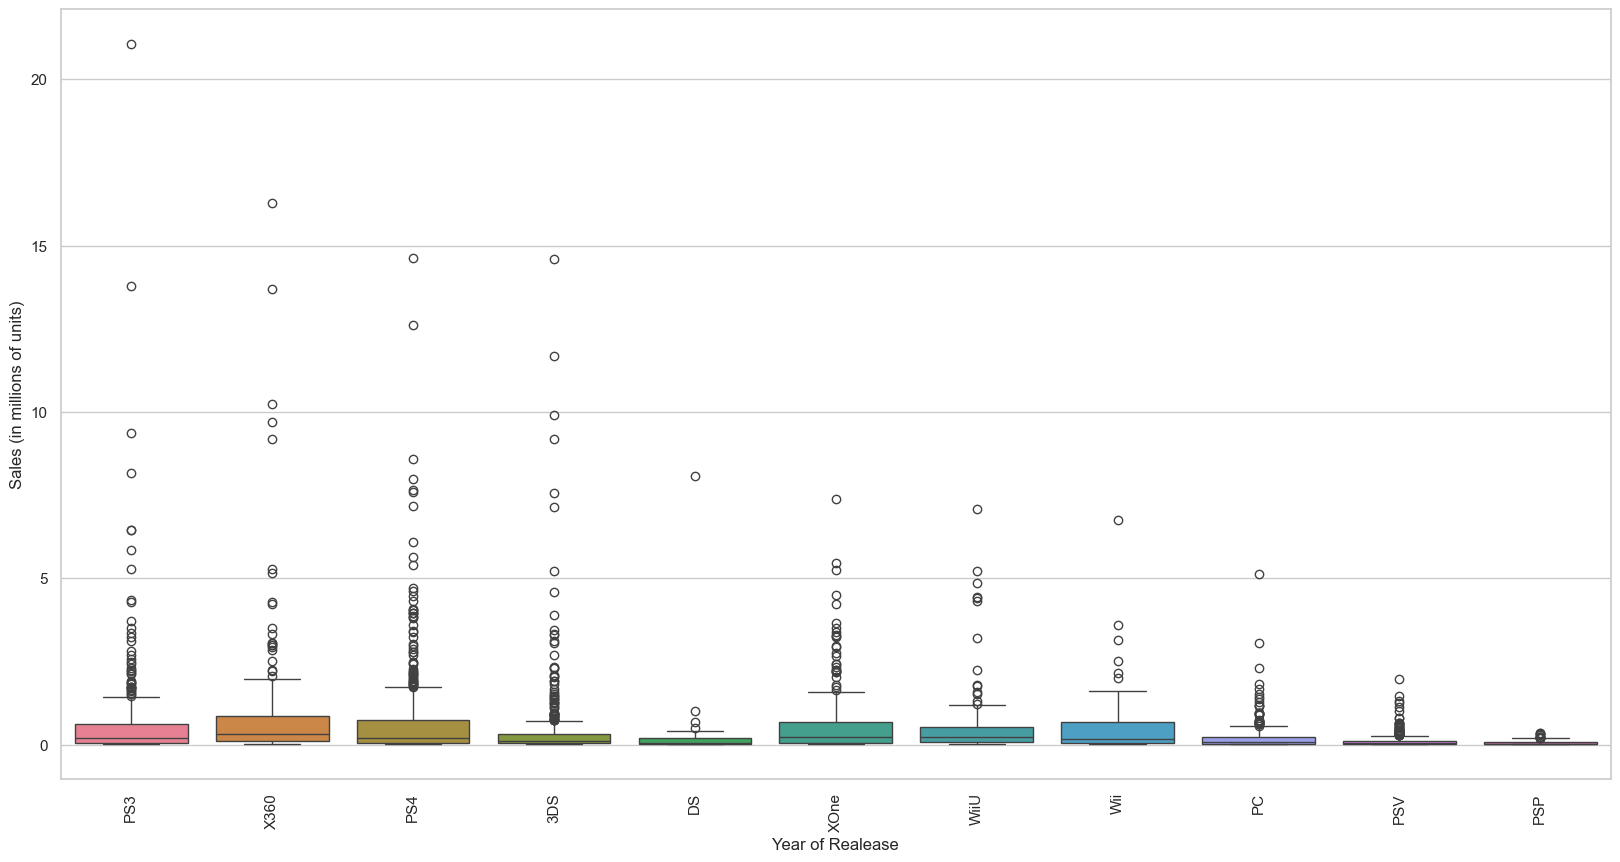

In [321]:
fig, (ax1) = plt.subplots(1, figsize=(20, 10))

sns.boxplot(hue = 'platform',
            hue_order = list_platform_from_2012,
            x = 'platform',
            y= 'total_sales',
            data = sales_from_2012, ax = ax1);

ax1.set_xlabel("Year of Realease");
ax1.set_ylabel("Sales (in millions of units)");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);

A diferença nas vendas das plataformas é significativa. Porém essa diferença é atribuída à outliers, jogos de grande sucesso que apresentam numeros de venda com um grande afastamento dos demais.

Quando analisamos os quartis e mediana não percebemos uma diferença tão grande quanto os números acumulados.

In [322]:
# Avaliando como as avaliações afetam as vendas:

critic_user_score_sales_from_2012 = sales_from_2012[['critic_score', 'user_score', 'total_sales']]
critic_user_score_sales_from_2012

,critic_score,user_score,total_sales
16,97.0,8.2,21.05
23,97.0,8.1,16.27
31,NaN,NaN,14.63
33,NaN,NaN,14.60
34,83.0,5.3,13.79
...,...,...,...
16703,NaN,NaN,0.01
16707,NaN,NaN,0.01
16710,NaN,NaN,0.01
16712,NaN,NaN,0.01


In [323]:
critic_user_score_sales_from_2012.isna().mean()

critic_score    0.545392
user_score      0.423770
total_sales     0.000000
dtype: float64

Devido ao grande numero de dados nulos, vou trabalhar com DataFrames separados para cada estudo, assim minimizo a perda de dados ao mínimo necessário. 

Mais abaixo vou gerar uma matriz de correlação das 3 colunas.

In [324]:
# Dataframe 'critic_score' e 'total_sales':

critic_score_sales_from_2012 = critic_user_score_sales_from_2012[['critic_score', 'total_sales']]
critic_score_sales_from_2012 = critic_score_sales_from_2012.dropna().sort_values(by= 'critic_score', ascending= False)
critic_score_sales_from_2012

,critic_score,total_sales
16,97.0,21.05
42,97.0,12.62
23,97.0,16.27
165,97.0,5.47
1730,96.0,1.17
...,...,...
7790,23.0,0.20
11222,20.0,0.09
10015,19.0,0.12
12822,19.0,0.06


In [325]:
# Calculando a correlação da avaliação dos críticos com as vendas:

correlation_critic_sales = critic_score_sales_from_2012['critic_score'].corr(critic_score_sales_from_2012['total_sales'])
correlation_critic_sales

0.3081967459207776

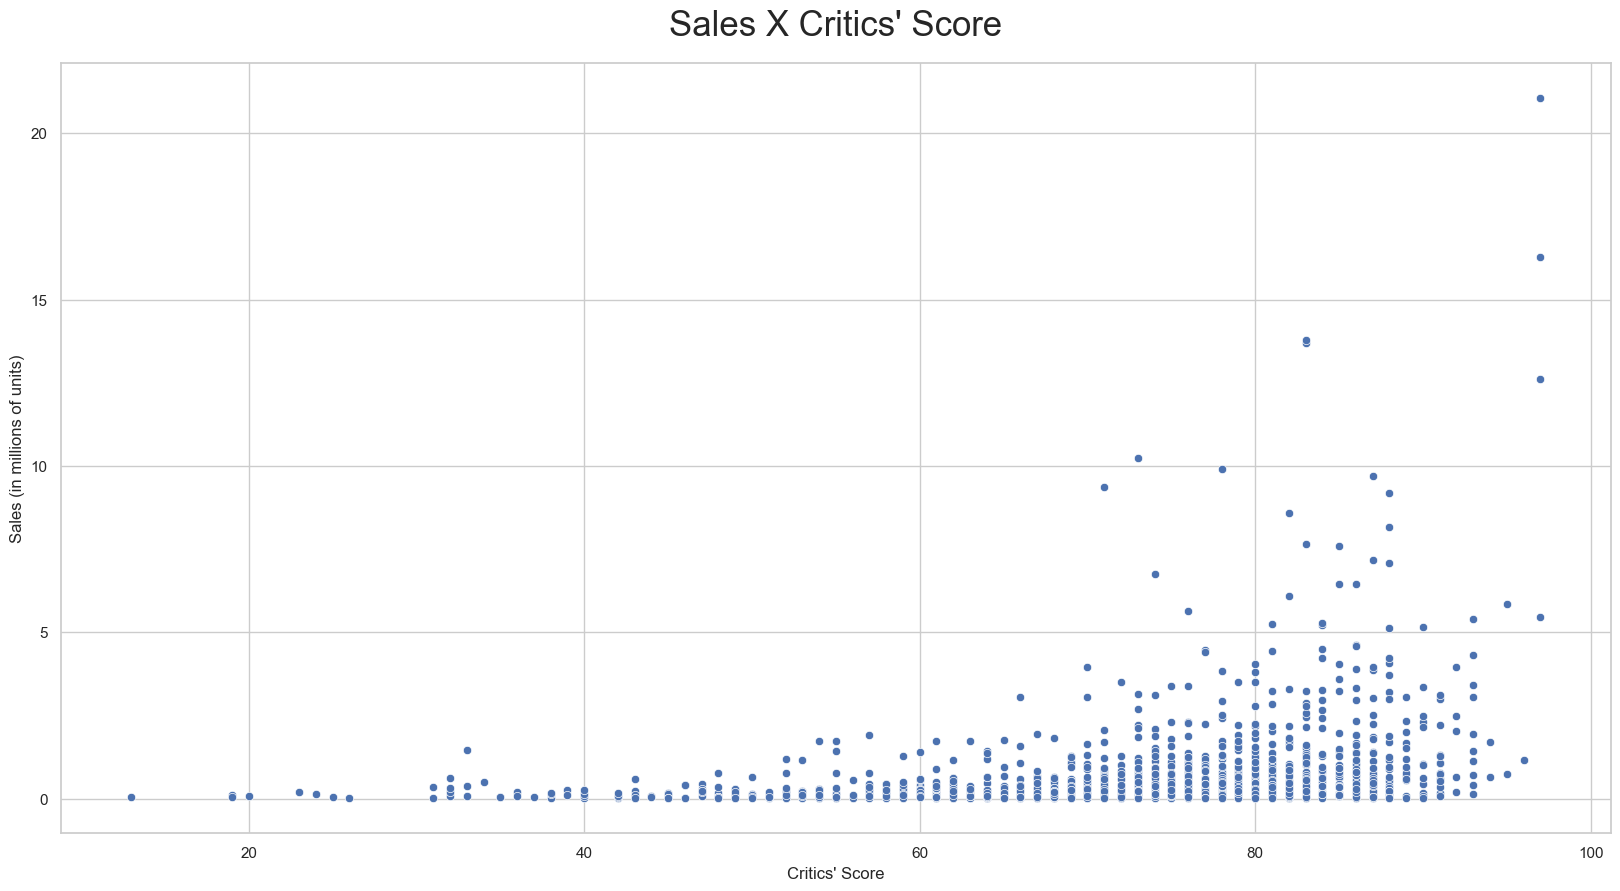

In [326]:
fig, (ax1) = plt.subplots(1, figsize=(20, 10))

sns.scatterplot(x = 'critic_score',
            y= 'total_sales',
            data = critic_score_sales_from_2012, ax = ax1);

ax1.set_title("Sales X Critics' Score", fontsize=25, pad=20);
ax1.set_xlabel("Critics' Score");
ax1.set_ylabel("Sales (in millions of units)");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=00);

Analisando o gráfico de dispersão percebemos que por mais que a correlação positiva não seja forte, ela existe. 

O jogos com mais vendas são os jogos melhor avaliados pelos críticos.

In [327]:
# Dataframe 'user_score' e 'total_sales':

user_score_sales_from_2012 = critic_user_score_sales_from_2012[['user_score', 'total_sales']]
user_score_sales_from_2012 = user_score_sales_from_2012.dropna().sort_values(by= 'user_score')
user_score_sales_from_2012

,user_score,total_sales
9970,0.2,0.11
8265,0.7,0.18
13689,1,0.04
12822,1.3,0.06
16518,1.4,0.01
...,...,...
11212,tbd,0.09
11374,tbd,0.08
6186,tbd,0.29
6369,tbd,0.28


In [328]:
# Tratando as linhas com dados 'tbd' para calcular a correlação:

user_score_no_tbd_sales_from_2012 = user_score_sales_from_2012.query('user_score != "tbd"')

In [329]:
# Calculando a correlação da avaliação dos críticos com as vendas:

correlation_user_sales = user_score_no_tbd_sales_from_2012['user_score'].corr(user_score_no_tbd_sales_from_2012['total_sales'])
correlation_user_sales

0.004428817675493262

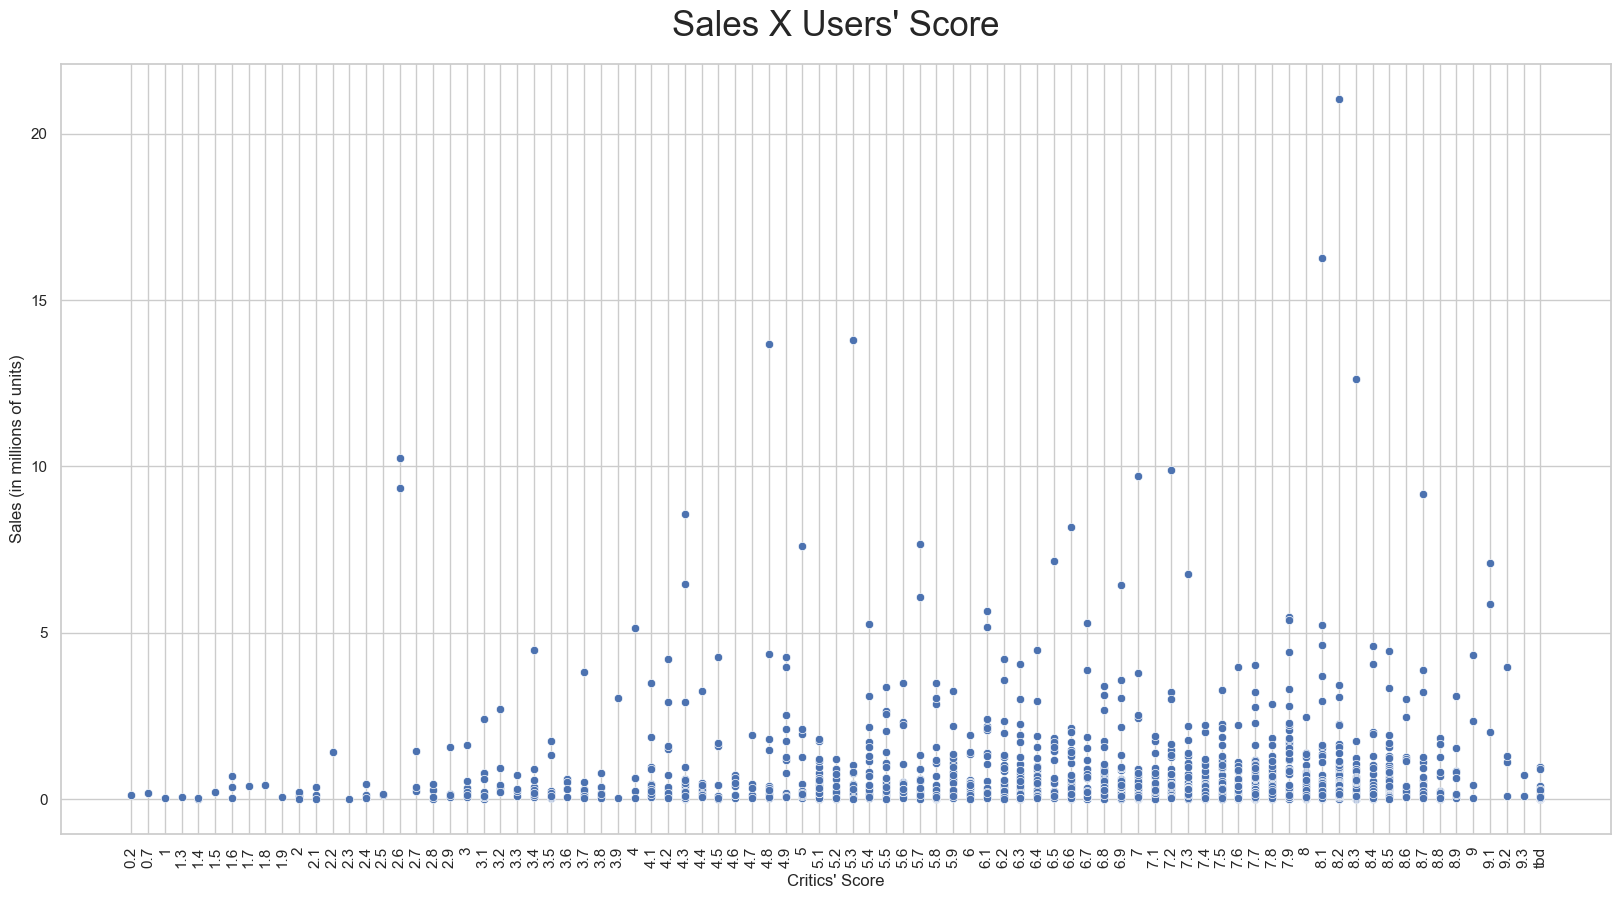

In [330]:
fig, (ax1) = plt.subplots(1, figsize=(20, 10))

sns.scatterplot(x = 'user_score',
            y= 'total_sales',
            data = user_score_sales_from_2012, ax = ax1);

ax1.set_title("Sales X Users' Score", fontsize=25, pad=20);
ax1.set_xlabel("Critics' Score");
ax1.set_ylabel("Sales (in millions of units)");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);

O grafico de disperção confirma visualmente a correlação quase nula calculada acima (0.0005966665040503166).

In [331]:
# Matriz de correlação

corr_critic_user_score_sales_from_2012 = critic_user_score_sales_from_2012.query('user_score != "tbd"')
corr_critic_user_score_sales_from_2012 = corr_critic_user_score_sales_from_2012.dropna()
corr_critic_user_score_sales_from_2012

,critic_score,user_score,total_sales
16,97.0,8.2,21.05
23,97.0,8.1,16.27
34,83.0,5.3,13.79
35,83.0,4.8,13.68
42,97.0,8.3,12.62
...,...,...,...
16613,49.0,2.1,0.01
16630,63.0,8.2,0.01
16652,81.0,8.5,0.01
16660,74.0,6.7,0.01


In [332]:
corr_critic_user_score_sales_from_2012.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.517727,0.306516
user_score,0.517727,1.000000,0.000597
total_sales,0.306516,0.000597,1.000000


A limpaza dos dados usando com o método .dropna() aplicado no mesmo momento as colunas não comprometeu as informações.

Além do analisado anteriormente podemos observar com a matriz de correlação uma correlação positiva moderada entre a avaliação dos críticos e usuários.

In [333]:
# Analisar os 20 jogos com mais vendas (desde 2012) e suas vendas em diferentes plataformas:

best_sellers = sales_from_2012.groupby('name')['total_sales'].sum().reset_index().sort_values(by= 'total_sales', ascending= False)
best_sellers = best_sellers.head(10)

In [334]:
list_best_sellers = best_sellers['name'].to_list()
list_best_sellers

['Grand Theft Auto V',
 'Call of Duty: Black Ops II',
 'Call of Duty: Ghosts',
 'Call of Duty: Black Ops 3',
 'Minecraft',
 'Call of Duty: Advanced Warfare',
 'FIFA 15',
 'FIFA 14',
 'FIFA 16',
 'FIFA Soccer 13']

In [335]:
data_best_sellers_from_2012 = sales_from_2012.query('name in @list_best_sellers')
data_best_sellers_from_2012

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
6097,FIFA 15,PC,2014,Sports,0.00,0.27,0.00,0.02,82.0,4.2,E,0.29
6463,Call of Duty: Black Ops 3,PC,2015,Shooter,0.00,0.25,0.00,0.01,NaN,NaN,NaN,0.26
6871,FIFA 14,3DS,2013,Sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN,0.23
7575,FIFA 16,PC,2015,Sports,0.06,0.13,0.00,0.01,81.0,4.4,E,0.20


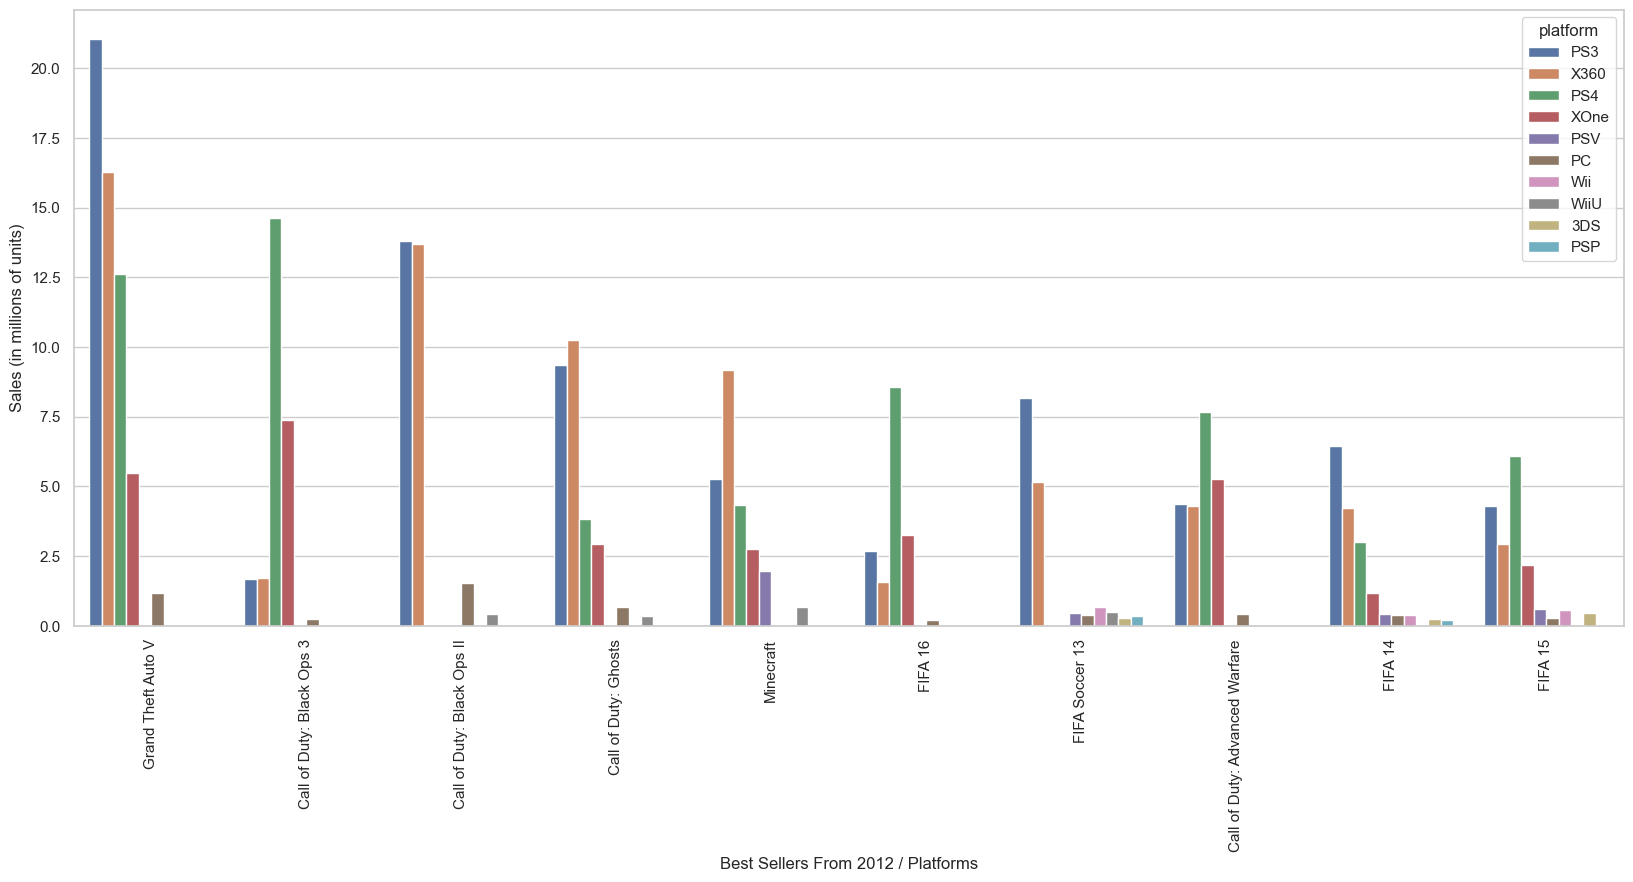

In [336]:
fig, (ax1) = plt.subplots(1, figsize=(20, 8))

sns.barplot(hue = 'platform',
            x = 'name',
            y= 'total_sales',
            data = data_best_sellers_from_2012, ax = ax1);

ax1.set_xlabel("Best Sellers From 2012 / Platforms");
ax1.set_ylabel("Sales (in millions of units)");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);

Para o sucesso de vendas dos jogos é importante que as desenvolvedoras de jogos os disponibilizem em diferentes plataformas.

Como esperado, as plataformas dominantes são responsáveis pelos maiores numeros de vendas de cada jogo.

In [337]:
# Destribuição geral de jogos por gênero (vendas):

genre_sales = sales_from_2012.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum().reset_index().sort_values(by= 'total_sales', ascending= False).reset_index(drop= True)
genre_sales

,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Action,177.84,159.34,52.80,51.14,441.12
1,Shooter,144.77,113.47,9.23,37.26,304.73
2,Role-Playing,64.00,48.53,65.44,14.83,192.80
3,Sports,81.53,69.09,8.01,22.44,181.07
4,Misc,38.19,26.32,12.86,7.67,85.04
5,Platform,25.38,21.41,8.63,5.58,61.00
6,Racing,17.22,27.29,2.50,6.49,53.50
7,Fighting,19.79,10.79,9.44,4.47,44.49
8,Simulation,7.97,14.55,10.41,2.19,35.12
9,Adventure,8.92,9.46,8.24,2.81,29.43


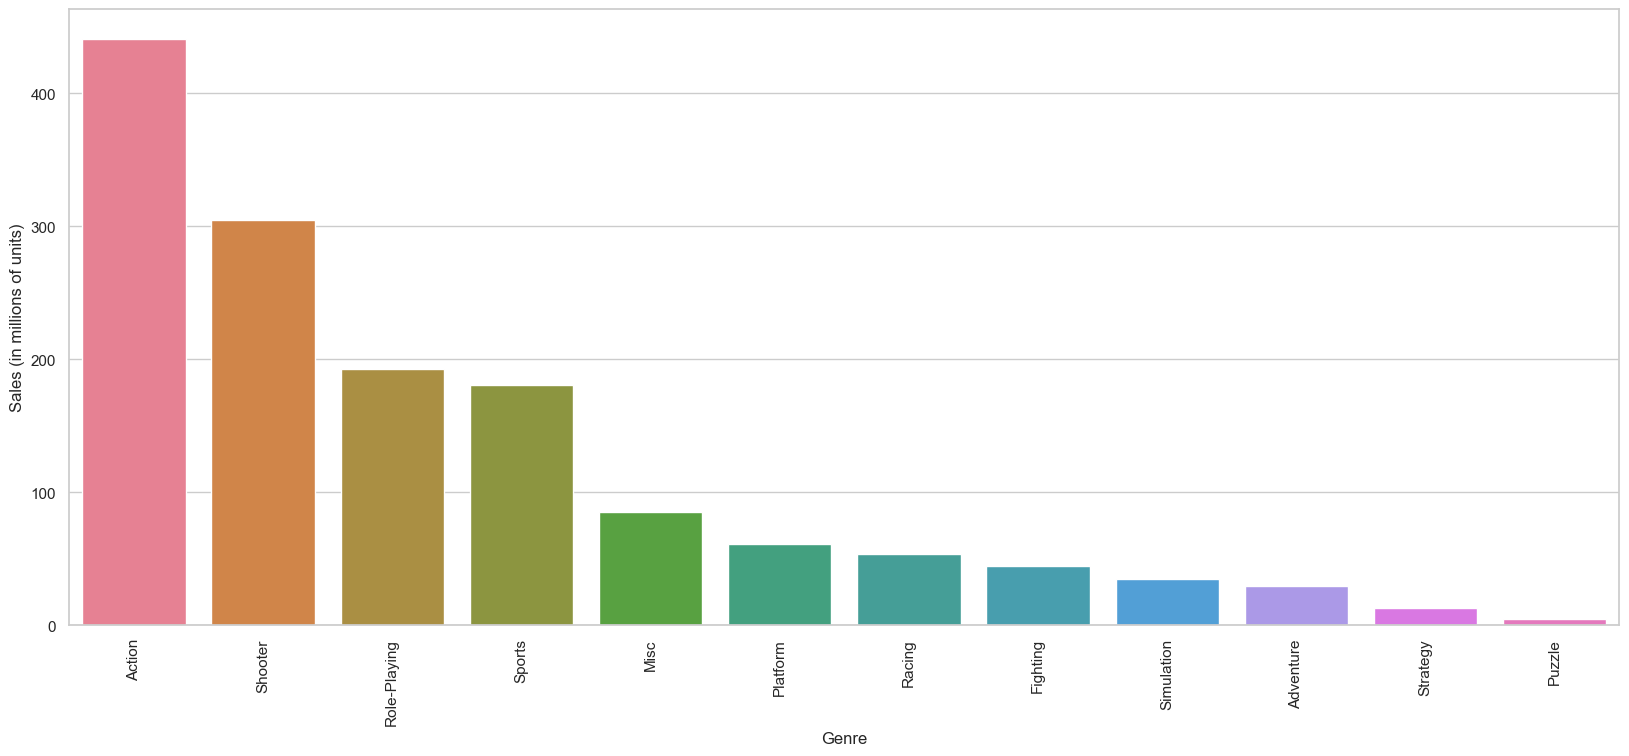

In [338]:
# Representação das vendas totais por genero:

fig, (ax1) = plt.subplots(1, figsize=(20, 8))

sns.barplot(hue = 'genre',
            x = 'genre',
            y= 'total_sales',
            data = genre_sales, ax = ax1);

ax1.set_xlabel("Genre");
ax1.set_ylabel("Sales (in millions of units)");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);

Com o estudo acima podemos constatar que jogos de ação são os mais vendidos. Os outros três generos que completam as lista dos top4 são os jogos de tiros, RPG e esportes.



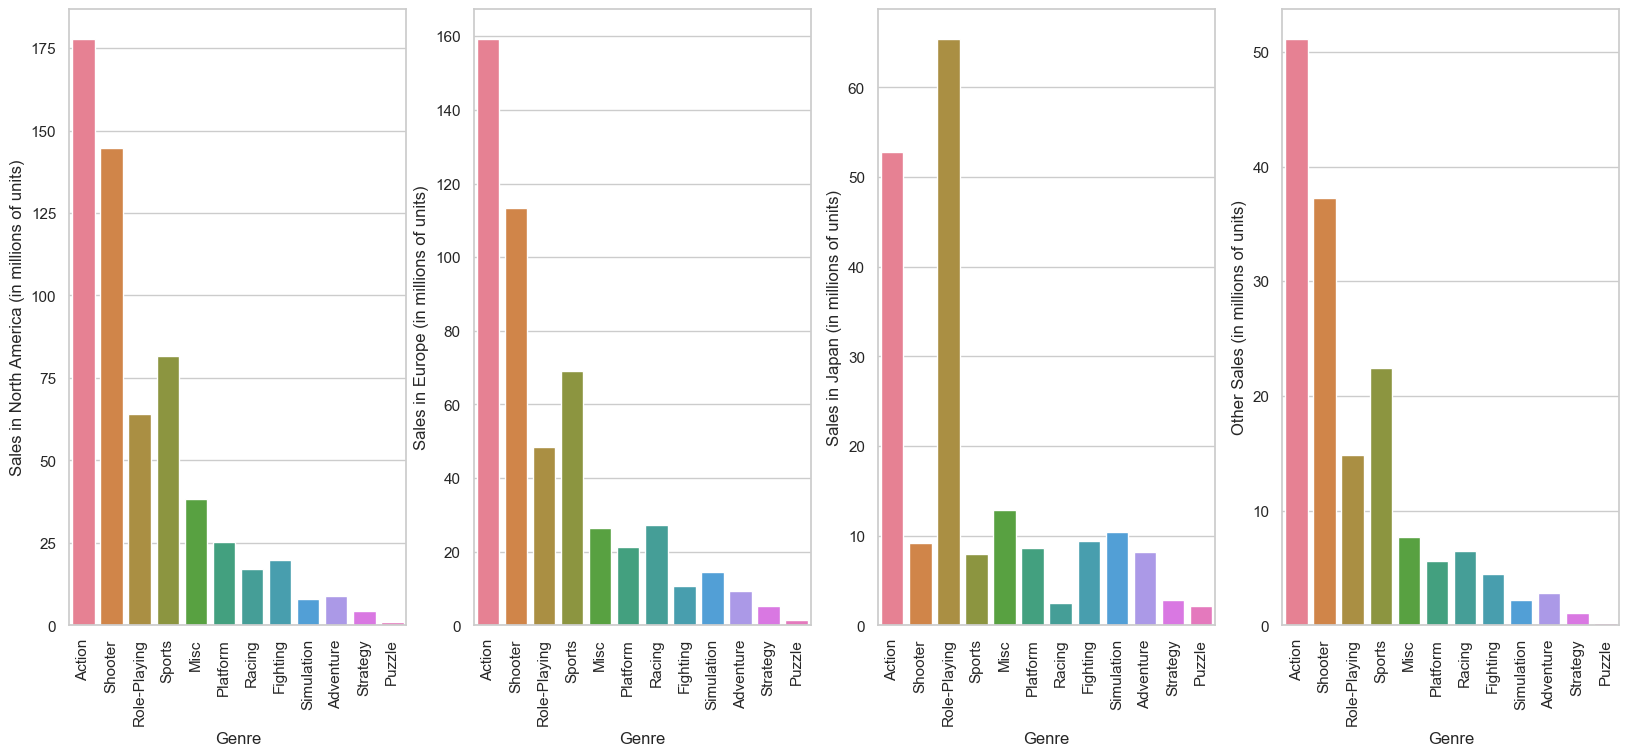

In [339]:
# Comparação das vendas dos generos por regiões:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

sns.barplot(hue = 'genre',
            x = 'genre',
            y= 'na_sales',
            data = genre_sales, ax = ax1);

sns.barplot(hue = 'genre',
            x = 'genre',
            y= 'eu_sales',
            data = genre_sales, ax = ax2);

sns.barplot(hue = 'genre',
            x = 'genre',
            y= 'jp_sales',
            data = genre_sales, ax = ax3);

sns.barplot(hue = 'genre',
            x = 'genre',
            y= 'other_sales',
            data = genre_sales, ax = ax4);

ax1.set_xlabel("Genre");
ax1.set_ylabel("Sales in North America (in millions of units)");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);

ax2.set_xlabel("Genre");
ax2.set_ylabel("Sales in Europe (in millions of units)");
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90);

ax3.set_xlabel("Genre");
ax3.set_ylabel("Sales in Japan (in millions of units)");
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=90);

ax4.set_xlabel("Genre");
ax4.set_ylabel("Other Sales (in millions of units)");
ax4.set_xticklabels(ax1.get_xticklabels(), rotation=90);

O consumo dos jogos por genero na América do Norte, Europa e outras regiões seguem um padrão. Porém as diferenças de preferência no Japão é clara. 

Diferente da visão geral das vendas, o genero mais vendido no Japão é o RPG.

Enquanto jogos de tiro estão em segundo lugar nas vendas mundiais, no japão não ocupam lugar no Top5.

O mercado no Japão é diferente dos demais e precisa ser analisado individualmente para tomada de decisão das empresas que atuam nesse setor.

<h3 style = 'color: orange'> Etapa 4. Crie um perfil de usuário para cada região</h3>

In [340]:
# As 5 principais plataformas e suas participações no mercado de cada região:

platform_market_shares = sales_from_2012.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum().reset_index().sort_values(by= 'total_sales', ascending= False).reset_index(drop= True).head()
platform_market_shares

,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,PS4,108.74,141.09,15.96,48.35,314.14
1,PS3,103.38,106.86,35.29,43.26,288.79
2,X360,140.05,74.52,1.57,20.40,236.54
3,3DS,55.31,42.64,87.79,8.87,194.61
4,XOne,93.12,51.59,0.34,14.27,159.32


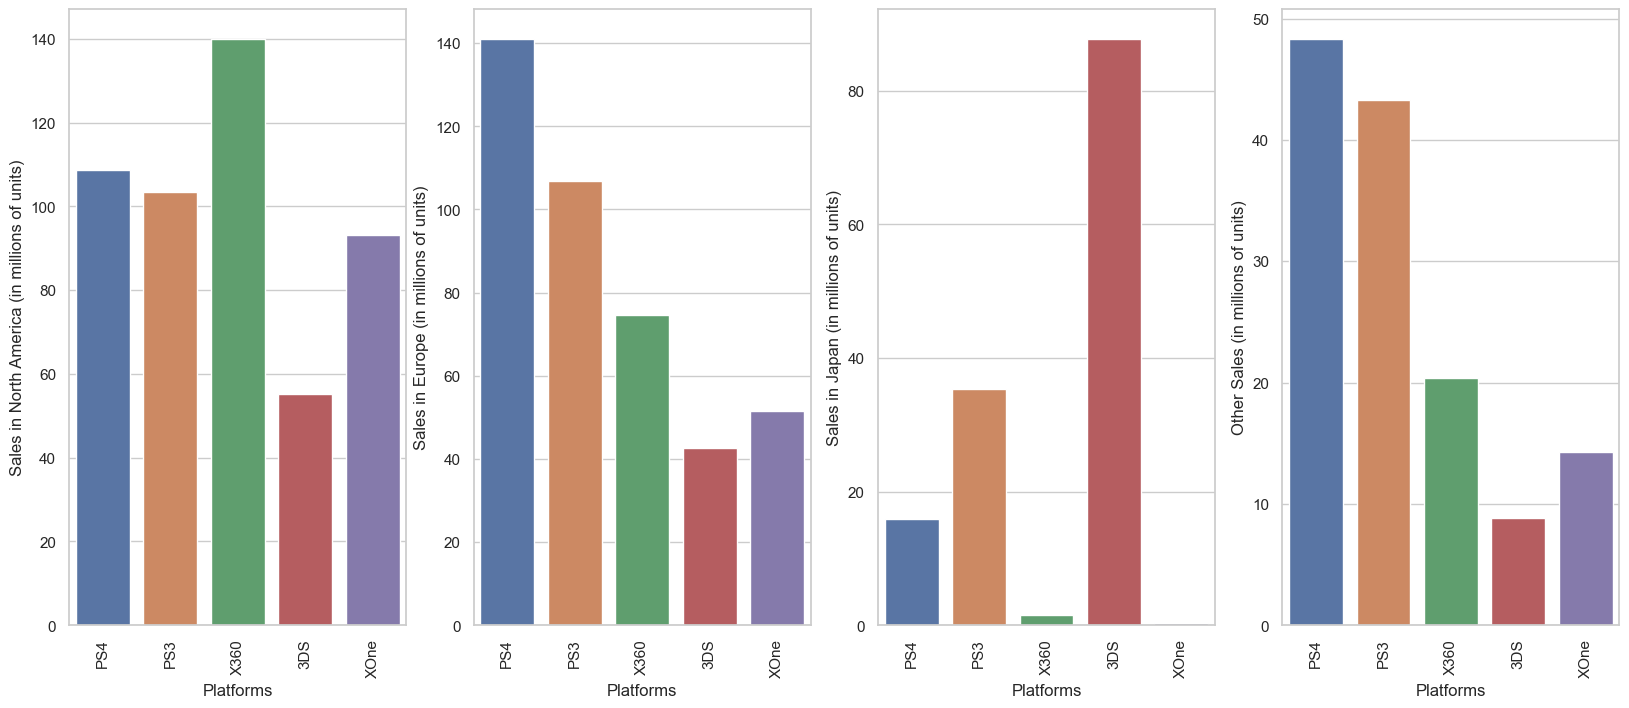

In [341]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

sns.barplot(hue = 'platform',
            x = 'platform',
            y= 'na_sales',
            data = platform_market_shares, ax = ax1);

sns.barplot(hue = 'platform',
            x = 'platform',
            y= 'eu_sales',
            data = platform_market_shares, ax = ax2);

sns.barplot(hue = 'platform',
            x = 'platform',
            y= 'jp_sales',
            data = platform_market_shares, ax = ax3);

sns.barplot(hue = 'platform',
            x = 'platform',
            y= 'other_sales',
            data = platform_market_shares, ax = ax4);

ax1.set_xlabel("Platforms");
ax1.set_ylabel("Sales in North America (in millions of units)");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);

ax2.set_xlabel("Platforms");
ax2.set_ylabel("Sales in Europe (in millions of units)");
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90);

ax3.set_xlabel("Platforms");
ax3.set_ylabel("Sales in Japan (in millions of units)");
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=90);

ax4.set_xlabel("Platforms");
ax4.set_ylabel("Other Sales (in millions of units)");
ax4.set_xticklabels(ax1.get_xticklabels(), rotation=90);

Ao analisar a preferência por plataformas para cada região, observamos a diferença de interesse no Japão do resto do mundo.

A plataformas PS (PS3 e PS4) somadas lideram a participação no mercado em todas as regiões com exceção do Japão, onde a plataforma 3DS possui enorme vantagem em relação a todas as outras plataformas.

O que acontece no Japão é completamente o oposto do resto do mundo, onde o 3DS é apenas a 5a força no mercado.

Esse contraste também está nítido nos números do X360 que apresenta bom desempenho em todas as regiões com exceção do Japão, onde os números podem ser considerados muito baixos.

In [342]:
# Os 5 principais generos e suas participações no mercado de cada região:

top5_genre_sales = genre_sales.head()

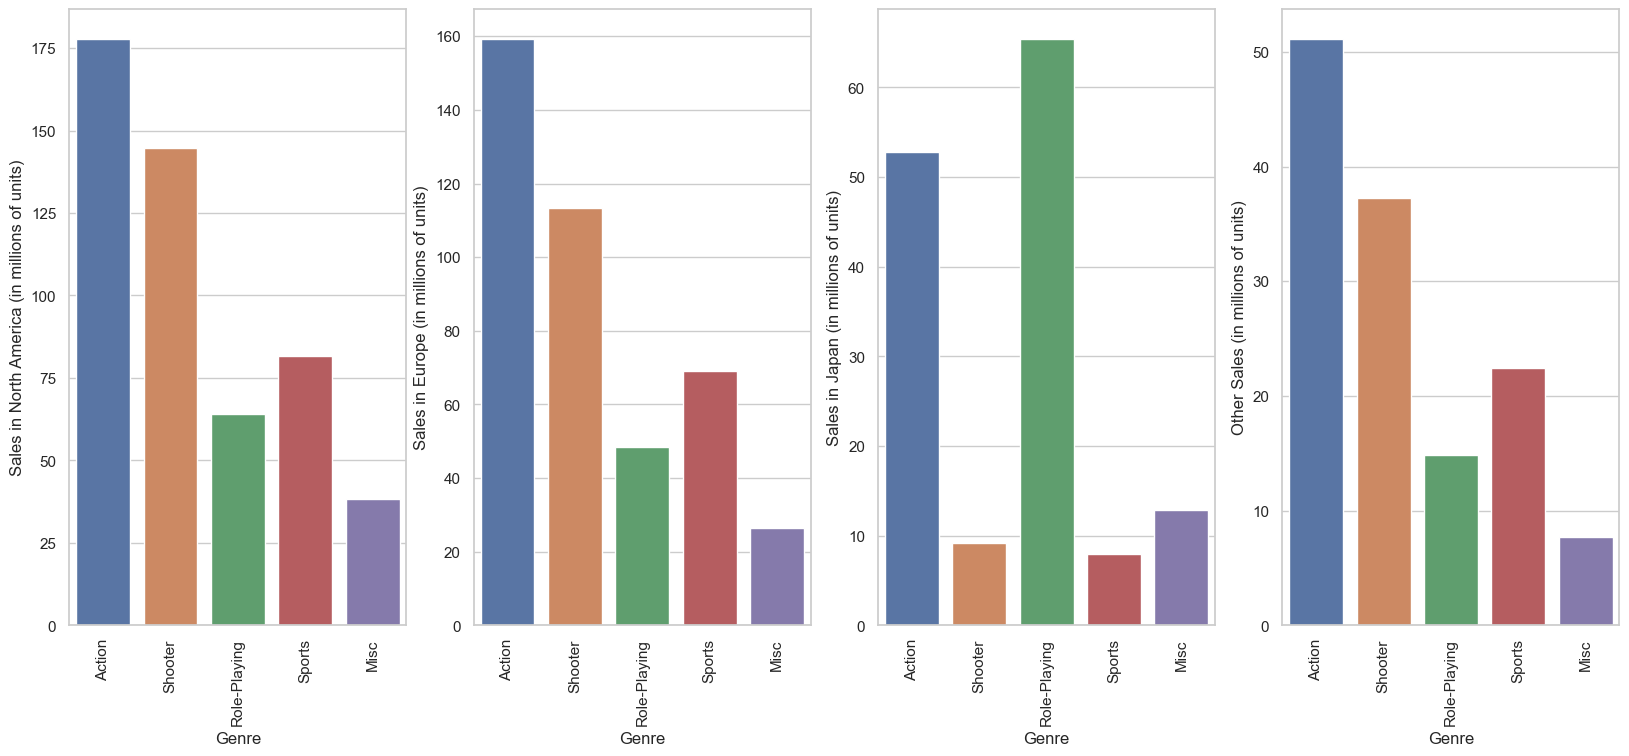

In [343]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

sns.barplot(hue = 'genre',
            x = 'genre',
            y= 'na_sales',
            data = top5_genre_sales, ax = ax1);

sns.barplot(hue = 'genre',
            x = 'genre',
            y= 'eu_sales',
            data = top5_genre_sales, ax = ax2);

sns.barplot(hue = 'genre',
            x = 'genre',
            y= 'jp_sales',
            data = top5_genre_sales, ax = ax3);

sns.barplot(hue = 'genre',
            x = 'genre',
            y= 'other_sales',
            data = top5_genre_sales, ax = ax4);

ax1.set_xlabel("Genre");
ax1.set_ylabel("Sales in North America (in millions of units)");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);

ax2.set_xlabel("Genre");
ax2.set_ylabel("Sales in Europe (in millions of units)");
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90);

ax3.set_xlabel("Genre");
ax3.set_ylabel("Sales in Japan (in millions of units)");
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=90);

ax4.set_xlabel("Genre");
ax4.set_ylabel("Other Sales (in millions of units)");
ax4.set_xticklabels(ax1.get_xticklabels(), rotation=90);

Conforme analisado anteriormente:

" O consumo dos jogos por genero na América do Norte, Europa e outras regiões seguem um padrão. Porém as diferenças de preferência no Japão é clara. 

Diferente da visão geral das vendas, o genero mais vendido no Japão é o RPG.

Enquanto jogos de tiro estão em segundo lugar nas vendas mundiais, no japão não ocupam lugar no Top5.

O mercado no Japão é diferente dos demais e precisa ser analisado individualmente para tomada de decisão das empresas que atuam nesse setor."

In [344]:
# Influência das classificações do ESRB nas vendas por regiões:

esrb = sales_from_2012.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum().reset_index()
esrb

,rating,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,E,114.37,113.03,28.33,31.44,287.17
1,E10+,75.70,55.37,8.19,16.23,155.49
2,M,231.57,193.96,21.20,63.38,510.11
3,T,66.02,52.96,26.02,17.94,162.94


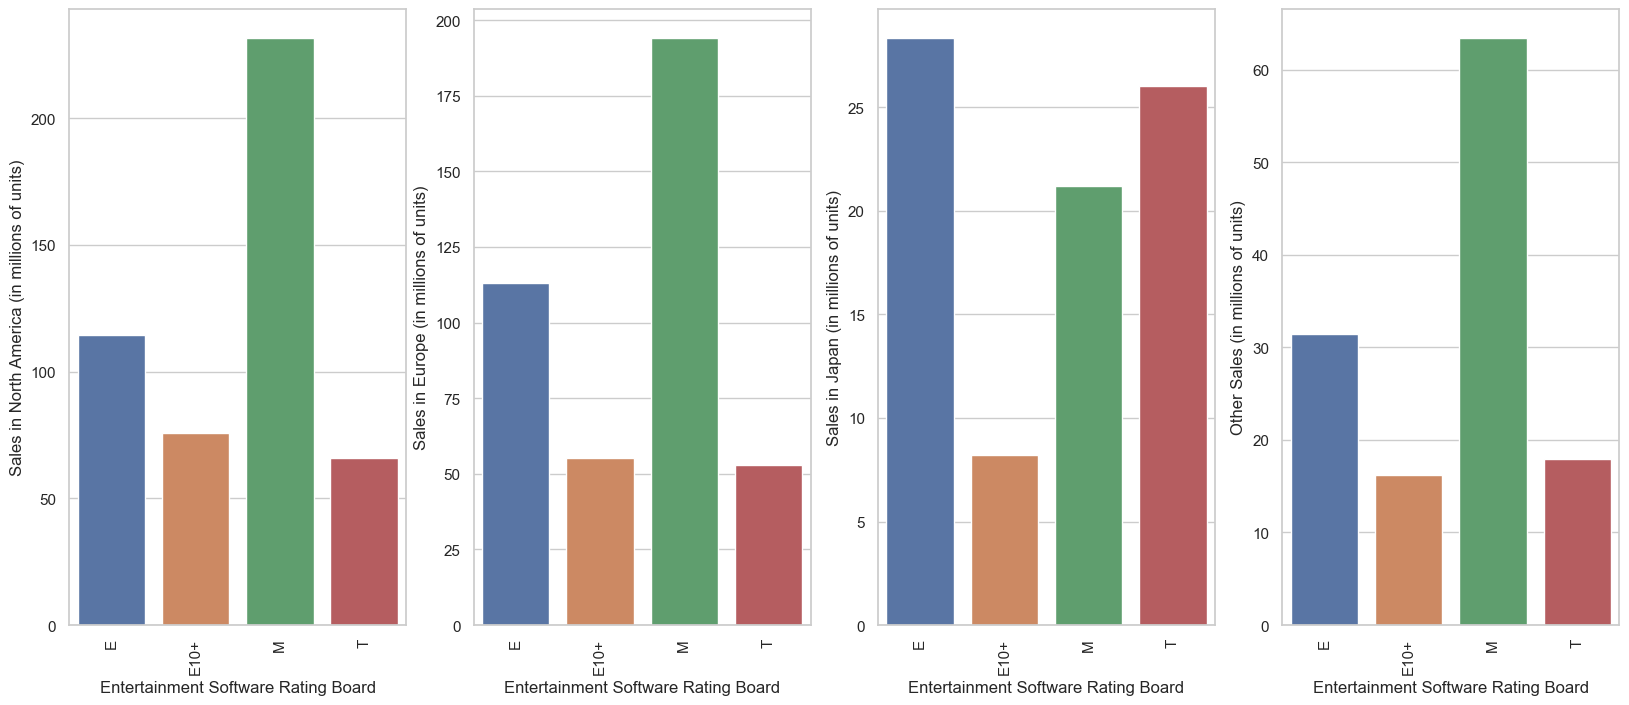

In [345]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

sns.barplot(hue = 'rating',
            x = 'rating',
            y= 'na_sales',
            data = esrb, ax = ax1);

sns.barplot(hue = 'rating',
            x = 'rating',
            y= 'eu_sales',
            data = esrb, ax = ax2);

sns.barplot(hue = 'rating',
            x = 'rating',
            y= 'jp_sales',
            data = esrb, ax = ax3);

sns.barplot(hue = 'rating',
            x = 'rating',
            y= 'other_sales',
            data = esrb, ax = ax4);

ax1.set_xlabel("Entertainment Software Rating Board");
ax1.set_ylabel("Sales in North America (in millions of units)");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90);

ax2.set_xlabel("Entertainment Software Rating Board");
ax2.set_ylabel("Sales in Europe (in millions of units)");
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90);

ax3.set_xlabel("Entertainment Software Rating Board");
ax3.set_ylabel("Sales in Japan (in millions of units)");
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=90);

ax4.set_xlabel("Entertainment Software Rating Board");
ax4.set_ylabel("Other Sales (in millions of units)");
ax4.set_xticklabels(ax1.get_xticklabels(), rotation=90);

Na América do Norte as vendas de jogos adultos ('M') são cosideravelmente mais altas que os jogos com demais classificações. Isso também acontece na Europa e demais regiões. Apenas o Japão é uma exceção onde a classificação mais vendida é a 'E' (para todas as faixa etárias).

No japão a classificação 'T' (adolescentes) ocupa o segundo lugar em vendas com valores muito próximos da classificação dominante. Esse desempenho não acontece nas demais regiões, onde a classificação 'T' está praticamente empatada em 4o lugar com a classificação 'E10+', que também ocupa esse lugar no Japão.

<h3 style = 'color: orange'> Etapa 5. Teste as seguintes hipóteses:</h3>

Realizarei um teste de hipótese para saber se as classificações médias dos usuários das plataformass Xbox one e PC são as mesmas. 

Para isso usaremos os dados da coluna 'user_score' que apresentam a pontuação dada pelos usuários para os jogos das plataformas.

Hipótese Nula = As classificações médias dos usuários das plataformass Xbox one e PC são as mesmas.
Hipótese Alternativa = As classificações médias dos usuários das plataformass Xbox one e PC não são as mesmas.

Limiar de significância estatística que será adotado = 5% 


O teste das seguintes hipóteses ajudara a perceber se o grau de satisfação dos usuários das plataformas pode ser considerado igual.

In [381]:
# Testando a hipótese de que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas:

xone_user_score = sales_from_2012.query('platform == "XOne"')
xone_user_score = xone_user_score.query('user_score != "tbd"')
xone_user_score = xone_user_score.dropna(subset= 'user_score')
xone_user_score = xone_user_score['user_score'].astype(float)
np.var(xone_user_score)

1.8965188383045526

In [386]:
xone_user_score.mean()

6.521428571428572

In [382]:
pc_user_score = sales_from_2012.query('platform == "PC"')
pc_user_score = pc_user_score.query('user_score != "tbd"')
pc_user_score = pc_user_score.dropna(subset= 'user_score')
pc_user_score = pc_user_score['user_score'].astype(float)
np.var(pc_user_score)

2.7569952398906588

In [387]:
pc_user_score.mean()

6.4286407766990274

In [380]:
alpha = 0.05

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)

print('valor-p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")


valor-p: 0.5489537965134912
Não podemos rejeitar a hipótese nula


Não podemos afirmar que as classificações médias dos usuários das plataformas Xbox One (6.521) e PC (6.428) são as mesmas. Porém não há evidências estatisticas de que elas são diferentes.

Realizarei um segundo teste de hipótese para saber se a classificações médias dos usuários para os gêneros Action (ação) e Sports (esportes) são diferentes. 

Para isso usaremos os dados da coluna 'user_score' que apresentam a pontuação dada pelos usuários para os dois generos em questão.

Hipótese Nula = As classificações médias dos usuários para os generos (Action (ação) e Sports (esportes)) são as mesmas.
Hipótese Alternativa = As classificações médias dos usuários para os generos (Action (ação) e Sports (esportes)) não são as mesmas.

Limiar de significância estatística que será adotado = 5%. 


O teste das seguintes hipóteses ajudara a perceber se o grau de satisfação dos usuários com os jogos dos generos para os generos Action (ação) e Sports (esportes) pode ser considerado igual.

In [393]:
# Testando a hipótese de que as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes:

action_user_score = sales_from_2012.query('genre == "Action"')
action_user_score = action_user_score.query('user_score != "tbd"')
action_user_score = action_user_score.dropna(subset= 'user_score')
action_user_score = action_user_score['user_score'].astype(float)
np.var(action_user_score)

1.8854720340439224

In [395]:
action_user_score.mean()

6.825047801147227

In [394]:
sports_user_score = sales_from_2012.query('genre == "Sports"')
sports_user_score = sports_user_score.query('user_score != "tbd"')
sports_user_score = sports_user_score.dropna(subset= 'user_score')
sports_user_score = sports_user_score['user_score'].astype(float)
np.var(sports_user_score)

3.0073882971729127

In [396]:
sports_user_score.mean()

5.455897435897437

In [397]:
alpha = 0.05

results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

print('valor-p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p: 4.24307776572644e-20
Rejeitamos a hipótese nula


Temos evidências estatisticas suficientes para dizer que as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

As hipóteses nulas foram formuladas atendendo o critério de que não haviam evidências estatisticas de que as médias das amostras estudadas eram diferentes. 

Em oposição às hipóteses nulas estão as hipóteses alternativas, que apontam haver evidências estatisticas de que as amostras estudadas possuem médias diferentes.

A significância estatística utilizada foi a de 5% por ser a medida comum utilizada. No teste bicaudal essa significância representa 2,5% para cada lado da distribuição.

<h3 style = 'color: orange'> Etapa 6. Escreva uma conclusão geral:</h3>

O estudo acima permitiu verificar o comportamento do mercado de video jogos no decorrer dos anos analisados. Verificamos que as vendas dos video jogos atingiram seu auge no ano de 2008 e logo depois sofreram uma grande queda. O mercado começou a estabilizar em 2012.

Foi possível perceber que as plataformas da Sony Play Station dominam o mercado à gerações de consoles. Por alguns anos tiveram essa hegemonia comprometida, mas a recuperaram.

Talvez a informação mais importante obtida seja a diferença comportamental dos consumidores no Japão comparados às demais regiões. Essa diferença se aplica aos generos e classificaçõe dos jogos mais vendidos e às plataformas de mais sucesso.